In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


(50000, 28, 28) (50000,)


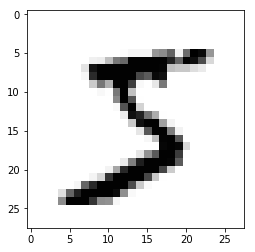

In [2]:
from preprocessed_mnist import load_dataset
x_train, y_train, x_val, y_val, x_test, y_test = load_dataset()
print(x_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap="Greys");

In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 28, 28) (50000,) (10000, 28, 28) (10000,)


In [4]:
#y_train = np.eye(10)[y_train]
#y_train[:500]

In [5]:
X_train = x_train.reshape(50000,784)
y_train = y_train.reshape(50000,1)
X_test = x_test.reshape(10000,784)
y_test = y_test.reshape(10000,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1)


In [6]:
X = tf.placeholder(shape = [None,784],dtype = tf.float32)
y = tf.placeholder(shape = [None,10],dtype = tf.float32)

In [7]:
weight1 = tf.Variable(initial_value = tf.truncated_normal([784,512]),dtype = tf.float32)
bias1 = tf.Variable(initial_value = np.zeros([512]),dtype = tf.float32)
weight2 = tf.Variable(initial_value = tf.truncated_normal([512,10]),dtype = tf.float32)
bias2 = tf.Variable(initial_value = np.zeros([10]),dtype = tf.float32)



In [8]:
y_pred1 = tf.nn.relu(tf.matmul(X,weight1)+bias1)
y_pred2 = tf.matmul(y_pred1,weight2)+bias2

print(y_pred1,y_pred2)

Tensor("Relu:0", shape=(?, 512), dtype=float32) Tensor("add_1:0", shape=(?, 10), dtype=float32)


In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred2,labels=y))

#optimizer = tf.train.GradientDescentOptimizer(1).minimize(cost)
optimizer = tf.train.AdamOptimizer(0.03).minimize(cost)

In [10]:
total_correct = tf.equal(tf.argmax(y_pred2,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(total_correct,tf.float32))

In [11]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
y_train = y_train.reshape(50000,10)
y_test = y_test.reshape(10000,10)

In [13]:
y1 = y_train.reshape(50000,10)
y1.shape

(50000, 10)

In [14]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
train_loss = []
test_loss = []
for i in range(100):
    for j in range(0,50000,5000):
        sess.run(optimizer,{X : X_train[j:j+5000,],y:y_train[j:j+5000,]})
    l1 = sess.run(cost,{X : X_train[:10000,],y:y_train[:10000,]})
    l2 = sess.run(cost,{X : X_test,y:y_test})
    train_loss.append(l1)
    test_loss.append(l2)
    if(i%10==0):
        print("train ", l1,"||","test ",l2)

train  22.7648 || test  23.7817
train  0.815608 || test  1.81434
train  0.198137 || test  1.35432
train  0.0846684 || test  1.31086
train  0.00219064 || test  1.20557
train  0.000114022 || test  1.19853
train  6.97736e-05 || test  1.19682
train  5.24793e-05 || test  1.19629
train  4.23093e-05 || test  1.19596
train  3.53949e-05 || test  1.19573


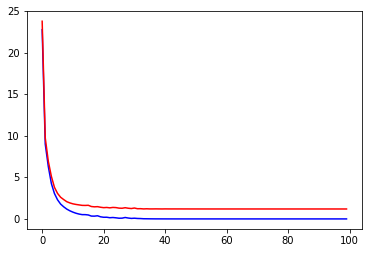

In [15]:
plt.plot(np.arange(100),train_loss,label="train",color="b")
plt.plot(np.arange(100),test_loss,label="test",color="r")
plt.show()

In [16]:
sess.run(accuracy,{X:X_test,y:y_test})

0.95529997